In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from utils import generate_random_sales
import os

# cree fichies data if not exist
if not os.path.exists('data'):
    os.makedirs('data')

In [11]:
# import les dates 
dates = pd.date_range(start='2025-01-01', end='2025-12-01', freq='MS')

# Ventes aléatoires de chaque produit
sales_A = generate_random_sales(50, 100, 12)   # المنتج A
sales_B = generate_random_sales(30, 80, 12)    # المنتج B  
sales_C = generate_random_sales(20, 60, 12)    # المنتج C
sales_D = generate_random_sales(10, 50, 12)    # المنتج D

# cree DataFrame premier 
df_initial = pd.DataFrame({
    'Date': dates,
    'Product_A': sales_A,
    'Product_B': sales_B,
    'Product_C': sales_C,
    'Product_D': sales_D
})

# save  initial.csv
df_initial.to_csv('data/initial.csv', index=False)
print("✅ the initial.csv save on  data")
print(df_initial)
print(df_initial.head())

✅ the initial.csv save on  data
         Date  Product_A  Product_B  Product_C  Product_D
0  2025-01-01         73         80         46         25
1  2025-02-01         84         40         21         20
2  2025-03-01         77         76         40         46
3  2025-04-01         71         34         47         18
4  2025-05-01         76         44         45         22
5  2025-06-01         89         64         54         48
6  2025-07-01         94         59         45         35
7  2025-08-01         88         35         57         41
8  2025-09-01         83         35         22         26
9  2025-10-01         67         32         30         19
10 2025-11-01        100         69         30         31
11 2025-12-01         96         63         41         14
        Date  Product_A  Product_B  Product_C  Product_D
0 2025-01-01         73         80         46         25
1 2025-02-01         84         40         21         20
2 2025-03-01         77         76         

In [12]:
# Copier les données et ajouter les métriques
df_final = df_initial.copy()
df_final = df_final.rename(columns={'Date': 'Month'})

# Liste des noms de produits
product_columns = ['Product_A', 'Product_B', 'Product_C', 'Product_D']

# Calcul des métriques de base
df_final['Total_Sales'] = df_final[product_columns].sum(axis=1)
df_final['Average_Sales'] = df_final[product_columns].mean(axis=1)
df_final['Month_over_Month_Growth'] = df_final['Total_Sales'].pct_change() * 100

# Fonction pour déterminer le trimestre
def get_quarter(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else:
        return 'Q4'

# Ajouter la colonne Quarter
df_final['Quarter'] = df_final['Month'].dt.month.apply(get_quarter)

# Ajouter les produits avec ventes max et min
df_final['Max_Sales_Product'] = df_final[product_columns].idxmax(axis=1)
df_final['Min_Sales_Product'] = df_final[product_columns].idxmin(axis=1)

# Sauvegarder en tant que final.csv
df_final.to_csv('data/final.csv', index=False)
print("✅ Fichier final.csv sauvegardé dans le dossier data")
print("\nAffichage des 5 premières lignes des données:")
print(df_final.head())

✅ Fichier final.csv sauvegardé dans le dossier data

Affichage des 5 premières lignes des données:
       Month  Product_A  Product_B  Product_C  Product_D  Total_Sales  \
0 2025-01-01         73         80         46         25          224   
1 2025-02-01         84         40         21         20          165   
2 2025-03-01         77         76         40         46          239   
3 2025-04-01         71         34         47         18          170   
4 2025-05-01         76         44         45         22          187   

   Average_Sales  Month_over_Month_Growth Quarter Max_Sales_Product  \
0          56.00                      NaN      Q1         Product_B   
1          41.25               -26.339286      Q1         Product_A   
2          59.75                44.848485      Q1         Product_A   
3          42.50               -28.870293      Q2         Product_A   
4          46.75                10.000000      Q2         Product_A   

  Min_Sales_Product  
0         Pro

In [13]:
# Tableau croisé dynamique pour les moyennes
pivot_avg = df_final.groupby('Quarter')[product_columns + ['Total_Sales']].mean().round(2)

# Tableau croisé dynamique pour les totaux
pivot_total = df_final.groupby('Quarter')['Total_Sales'].sum()

# Sauvegarder les résultats dans output.csv
with open('data/output.csv', 'w', encoding='utf-8') as f:
    f.write("Moyenne des ventes par trimestre (Average Sales Per Quarter)\n")
    pivot_avg.to_csv(f)
    f.write("\nTotal des ventes par trimestre (Total Sales Per Quarter)\n")
    pivot_total.to_csv(f)

print("✅ Fichier output.csv sauvegardé dans le dossier data")
print("\nMoyenne des ventes par trimestre:")
print(pivot_avg)
print("\nTotal des ventes par trimestre:")
print(pivot_total)

✅ Fichier output.csv sauvegardé dans le dossier data

Moyenne des ventes par trimestre:
         Product_A  Product_B  Product_C  Product_D  Total_Sales
Quarter                                                         
Q1           78.00      65.33      35.67      30.33       209.33
Q2           78.67      47.33      48.67      29.33       204.00
Q3           88.33      43.00      41.33      34.00       206.67
Q4           87.67      54.67      33.67      21.33       197.33

Total des ventes par trimestre:
Quarter
Q1    628
Q2    612
Q3    620
Q4    592
Name: Total_Sales, dtype: int64


In [14]:
# Meilleur mois
best_month_idx = df_final['Total_Sales'].idxmax()
best_month = df_final.loc[best_month_idx, 'Month']
best_month_sales = df_final.loc[best_month_idx, 'Total_Sales']

# Meilleur produit
annual_sales = df_final[product_columns].sum()
best_product = annual_sales.idxmax()
best_product_sales = annual_sales.max()

# Meilleur trimestre
best_quarter = pivot_total.idxmax()
best_quarter_sales = pivot_total.max()

print("🎯 Informations principales (Key Insights):")
print("=" * 50)
print(f"Meilleur mois: {best_month.strftime('%B %Y')} - {best_month_sales} ventes")
print(f"Meilleur produit: {best_product} - {best_product_sales} ventes annuelles")
print(f"Meilleur trimestre: {best_quarter} - {best_quarter_sales} ventes")
print(f"\nVentes annuelles par produit:")
for product, sales in annual_sales.items():
    print(f"  - {product}: {sales} ventes")

🎯 Informations principales (Key Insights):
Meilleur mois: June 2025 - 255 ventes
Meilleur produit: Product_A - 998 ventes annuelles
Meilleur trimestre: Q1 - 628 ventes

Ventes annuelles par produit:
  - Product_A: 998 ventes
  - Product_B: 631 ventes
  - Product_C: 478 ventes
  - Product_D: 345 ventes


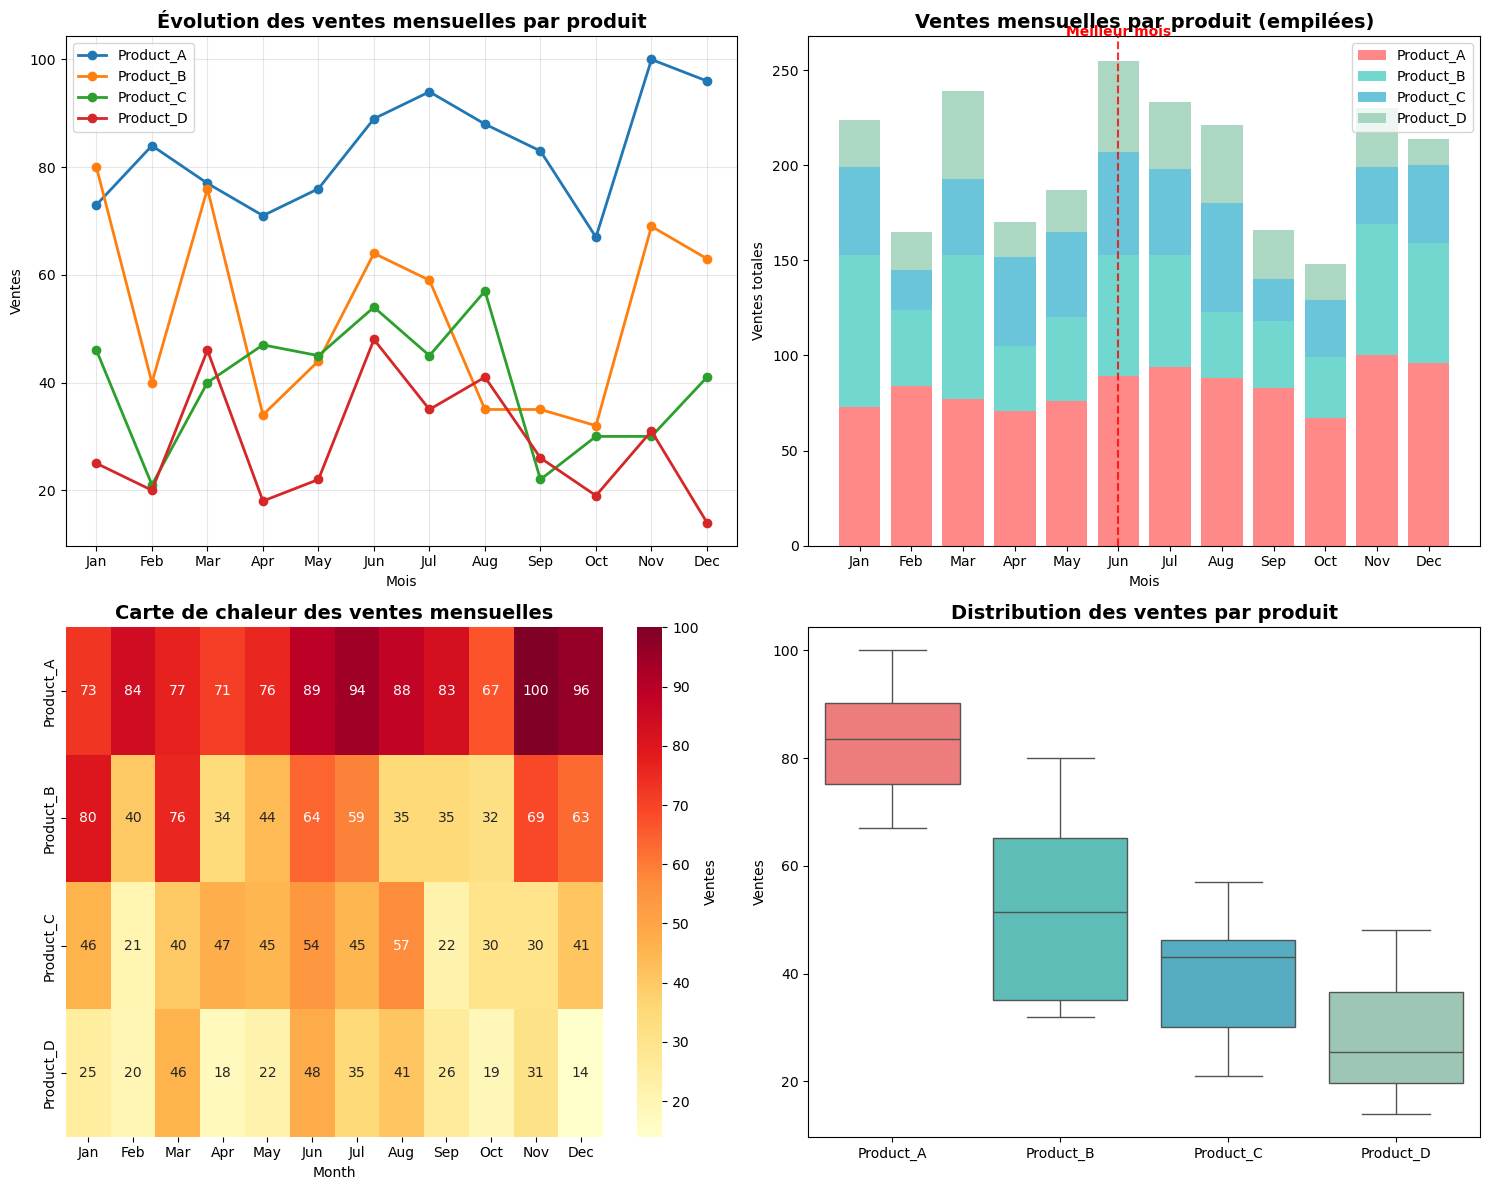

✅ Graphiques sauvegardés dans sales_analysis.png


In [15]:
# Configuration des graphiques
plt.figure(figsize=(15, 12))

# 1. Graphique en lignes
plt.subplot(2, 2, 1)
for product in product_columns:
    plt.plot(df_final['Month'].dt.strftime('%b'), df_final[product], marker='o', label=product, linewidth=2)
plt.title('Évolution des ventes mensuelles par produit', fontsize=14, fontweight='bold')
plt.xlabel('Mois')
plt.ylabel('Ventes')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Graphique à barres empilées
plt.subplot(2, 2, 2)
bottom = np.zeros(12)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
for i, product in enumerate(product_columns):
    plt.bar(df_final['Month'].dt.strftime('%b'), df_final[product], bottom=bottom, 
            label=product, color=colors[i], alpha=0.8)
    bottom += df_final[product].values

# Identifier le meilleur mois
plt.axvline(x=best_month_idx, color='red', linestyle='--', alpha=0.8)
plt.text(best_month_idx, best_month_sales * 1.05, 'Meilleur mois', 
         ha='center', color='red', fontweight='bold')

plt.title('Ventes mensuelles par produit (empilées)', fontsize=14, fontweight='bold')
plt.xlabel('Mois')
plt.ylabel('Ventes totales')
plt.legend()

# 3. Carte de chaleur
plt.subplot(2, 2, 3)
heatmap_data = df_final[product_columns].T
heatmap_data.columns = df_final['Month'].dt.strftime('%b')
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Ventes'})
plt.title('Carte de chaleur des ventes mensuelles', fontsize=14, fontweight='bold')

# 4. Diagramme en boîte
plt.subplot(2, 2, 4)
sns.boxplot(data=df_final[product_columns], palette=colors)
plt.title('Distribution des ventes par produit', fontsize=14, fontweight='bold')
plt.ylabel('Ventes')

plt.tight_layout()
plt.savefig('sales_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Graphiques sauvegardés dans sales_analysis.png")

In [10]:
print("🧠 الأسئلة الختامية والاستنتاجات:")
print("=" * 50)

# السؤال 1: أي منتج يساهم أكثر؟
contribution = (annual_sales / annual_sales.sum() * 100).round(1)
print("\n1. أي منتج يساهم أكثر في المبيعات السنوية؟")
for product, percent in contribution.items():
    print(f"   - {product}: {percent}%")
print(f"   → الجواب: {best_product} يساهم بنسبة {contribution[best_product]}%")

# السؤال 2: لماذا الربع الأفضل؟
print(f"\n2. لماذا الربع {best_quarter} هو الأفضل؟")
quarter_data = df_final[df_final['Quarter'] == best_quarter]
best_product_in_quarter = quarter_data[product_columns].sum().idxmax()
print(f"   - إجمالي المبيعات: {best_quarter_sales}")
print(f"   - المنتج الرائد: {best_product_in_quarter}")
print(f"   - متوسط النمو: {quarter_data['Month_over_Month_Growth'].mean():.1f}%")

# السؤال 3: تحسين الاستراتيجية
print(f"\n3. كيف يمكن تحسين الاستراتيجية للعام القادم؟")
print(f"   - التركيز على {best_product} خلال {best_quarter}")
print(f"   - تحليل أسباب نجاح {best_month.strftime('%B')}")
print(f"   - تحسين أداء المنتجات الضعيفة في الأرباع المنخفضة")
print(f"   - الاستفادة من النمو الشهري المتوسط: {df_final['Month_over_Month_Growth'].mean():.1f}%")

🧠 الأسئلة الختامية والاستنتاجات:

1. أي منتج يساهم أكثر في المبيعات السنوية؟
   - Product_A: 34.7%
   - Product_B: 28.7%
   - Product_C: 20.4%
   - Product_D: 16.2%
   → الجواب: Product_A يساهم بنسبة 34.7%

2. لماذا الربع Q2 هو الأفضل؟
   - إجمالي المبيعات: 600
   - المنتج الرائد: Product_A
   - متوسط النمو: 0.3%

3. كيف يمكن تحسين الاستراتيجية للعام القادم؟
   - التركيز على Product_A خلال Q2
   - تحليل أسباب نجاح January
   - تحسين أداء المنتجات الضعيفة في الأرباع المنخفضة
   - الاستفادة من النمو الشهري المتوسط: -0.0%
